## Welcome to this tutorial to get started with the [Sunny](https://github.com/SunnySuite/Sunny.jl) package, in preparation for the Oak Ridge National Laboratory Spin-Wave Workshop, September 2022.

> ![](https://raw.githubusercontent.com/SunnySuite/Sunny.jl/main/assets/sunny_logo.jpg)

## Some useful links first

####  General Information about the Package:
https://github.com/SunnySuite/Sunny.jl

#### Getting Started with Sunny:
https://github.com/SunnySuite/Sunny.jl/blob/main/GettingStarted.md

#### Repository of Tutorials:
https://github.com/SunnySuite/SunnyTutorials

#### Join the Slack workspace of the workshop to ask question:
https://join.slack.com/t/sunny-workshop-2022/shared_invite/zt-1f7urbk1t-A_pvDy6E7s_BGAnTAQMesw

## Why Su(n)ny?
#### Example 1: Modelling excitations of classical spin liquids

> 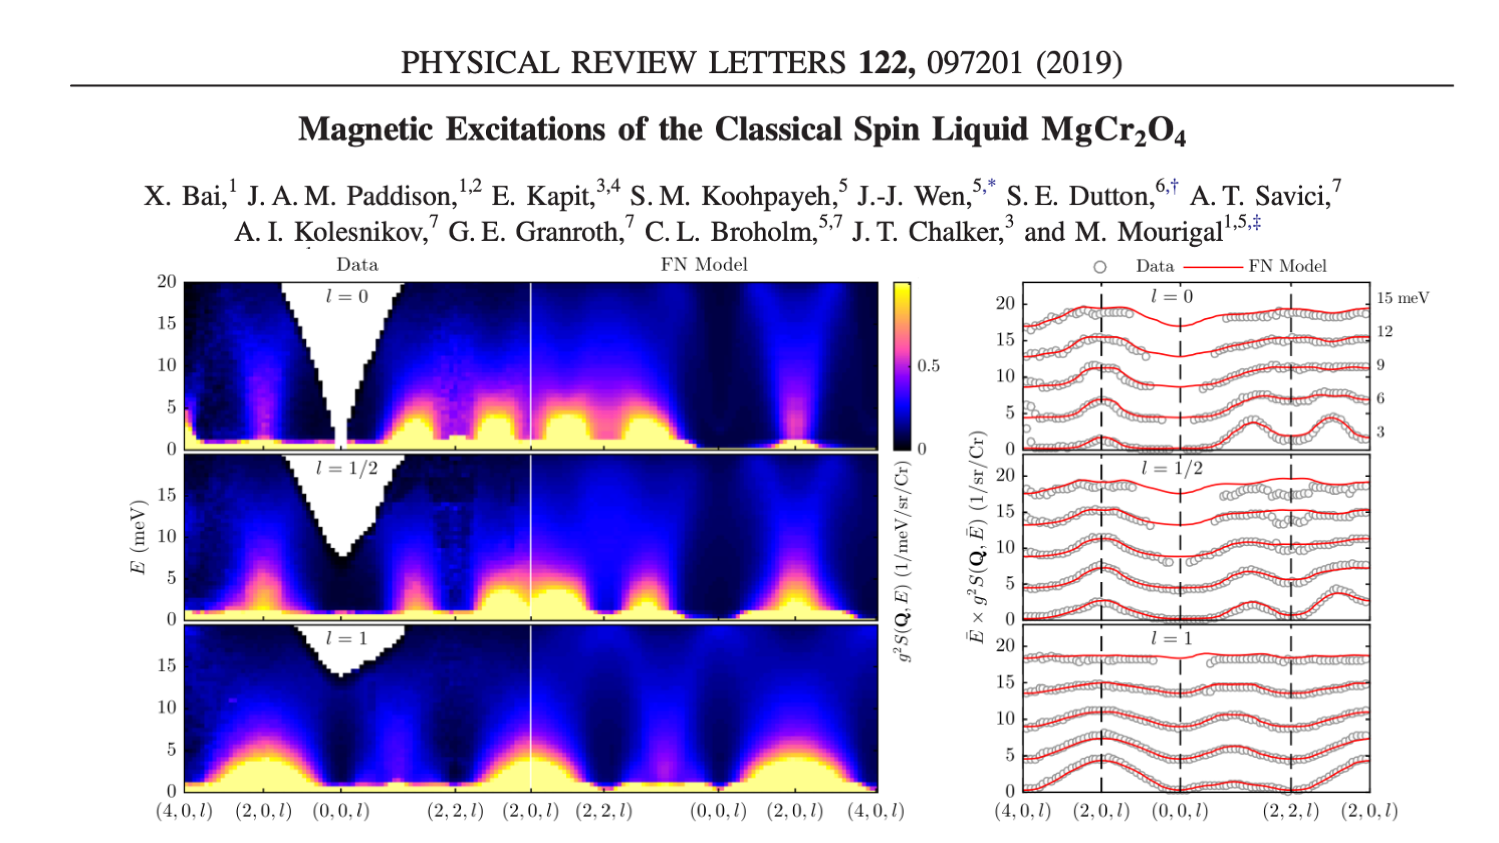

#### Example 2: ModeLling excitations of SU(N) spins 

> 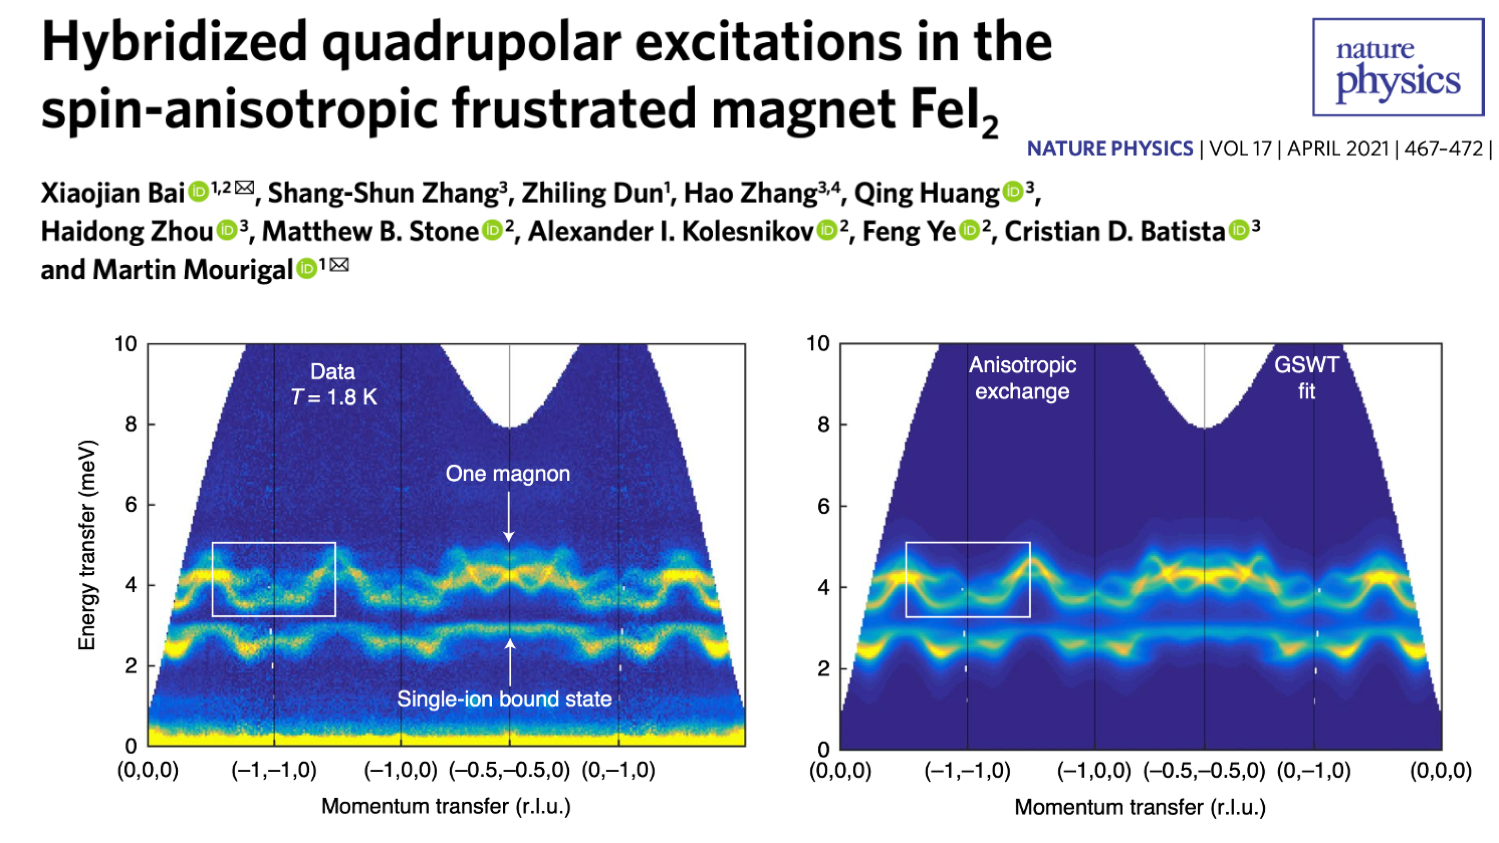





## How to get started?
### Step 1: Install Julia 1.8
Visit: https://julialang.org/downloads/ and download the version of Julia relevant for your machine.

### Step 2: Install the following Julia packages. Open the Julia console (REPL) and do:

    julia> ]

Then you will be working in the package manager of Julia. Add the following packages:
    
    pkg> add Sunny#main
    pkg> add GLMakie
    pkg> add IJulia

And optionally:

    pkg> add LinearAlgebra
    pkg> add StaticArrays
    pkg> add OffsetArrays
    pkg> add Plots

### Step 3: Test Su(n)ny

    pkg> test Sunny

If an error occurs, document it and contact the Su(n)ny developers by joining the following Slack channel: https://join.slack.com/t/sunny-workshop-2022/shared_invite/zt-1f7urbk1t-A_pvDy6E7s_BGAnTAQMesw

### Step 4: Test Jupyter notebooks
Exit the Package manager using backspace and then test Jupyter notebooks:

    julia> using IJulia
    julia> notebook()

A jupyter notebook will open in your web browser.


### Step 5a: Test a notebook and Sunny crystalographic visualization tool

Make sure the Jupyter notebook runs the Julia Kernal, copy past the Julia code below in a cell, and run the cell.

In [8]:
# === Load Necessary Packages === 
using Sunny
using GLMakie
Sunny.offline_viewers();

# === Define the Crystal structure of RbMnF3 === 
lat_vecs = lattice_vectors(4.218, 4.218, 4.218, 90.0, 90.0, 90.0);  
bas_vecs = [[0.0000000, 0.000000, 0.0000000],
            [0.5000000, 0.500000, 0.5000000],
            [0.5000000, 0.000000, 0.0000000],
            [0.0000000, 0.500000, 0.0000000],
            [0.0000000, 0.000000, 0.5000000]]; 
bas_typs = ["Mn","Rb","F","F","F"]; 
xtal_rbmnf3   = Crystal(lat_vecs, bas_vecs; types=bas_typs);
xtal_mn       = subcrystal(xtal_rbmnf3,"Mn"); # This creates a sub-crystal of Mn that preserves the symmetry of RbMnF3

# === Return crystalographic information gathered by Sunny about RbMnF3 === 
display(xtal_rbmnf3); # Note that Sunny correctly identifies the space-group and point-group for this system.
print_bond_table(xtal_mn, 7.0); # Sunny calculates equivalent bonds between 2 sites, here up to 7Å, and g-tensor anisotropy
print_allowed_anisotropy(xtal_mn, 1); # Sunny calculates local anisotropy for each crystalographic site
view_crystal(xtal, 7.0) # Sunny can also plot the unit-cell and the bonds up to a given distance, here 7Å

Crystal
HM symbol 'P m -3 m' (221)
Lattice params a=4.218, b=4.218, c=4.218, α=90°, β=90°, γ=90°
Cell volume 75.04
Type 'Mn', Wyckoff 1a (point group 'm-3m'):
   1. [0, 0, 0]
Type 'Rb', Wyckoff 1b (point group 'm-3m'):
   2. [0.5, 0.5, 0.5]
Type 'F', Wyckoff 3d (point group '4/mm.m'):
   3. [0.5, 0, 0]
   4. [0, 0.5, 0]
   5. [0, 0, 0.5]


Atom 1, type 'Mn', position [0, 0, 0], multiplicity 1
Allowed single-ion anisotropy or g-tensor: | A  0  0 |
                                           | 0  A  0 |
                                           | 0  0  A |

Bond(1, 1, [1, 0, 0])
Distance 4.218, coordination 6
Connects 'Mn' at [0, 0, 0] to 'Mn' at [1, 0, 0]
Allowed exchange matrix: | A  0  0 |
                         | 0  B  0 |
                         | 0  0  B |

Bond(1, 1, [1, 1, 0])
Distance 5.9652, coordination 12
Connects 'Mn' at [0, 0, 0] to 'Mn' at [1, 1, 0]
Allowed exchange matrix: | A  C  0 |
                         | C  A  0 |
                         | 0  0  B |

# Stevens operators at various orders k
𝒪₂ = stevens_operators(N, 2)
𝒪₄ = stevens_operators(N, 4)
𝒪₆ = stevens_operators(N, 6)

# Allowed anisotropies
A₄(𝒪₄[0]+5𝒪₄[4])
A₆(𝒪₆[0]-21𝒪₆[4])


SunnyViewer(...)

### Step 5b: More Notebook Tests and test of Sunny spin visualization using GLMakie

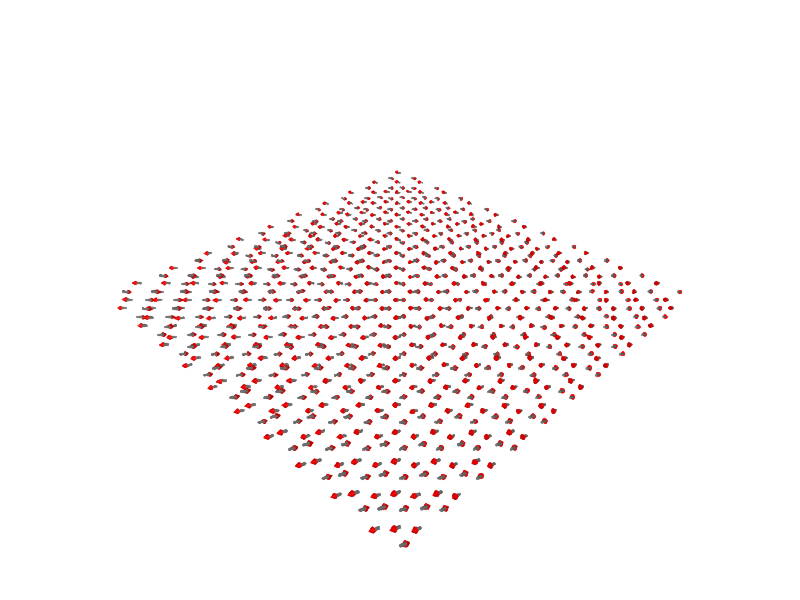

In [39]:
## === Define Spin Local Hilbert Space ===
N = 0;
g = 2.0;
S = 5/2;
lhs  = SiteInfo(1; N=N, g=g, spin_rescaling=S);  # Local Hilbert Space for a spin-5/2 treated classically and with g=2

## === Define Exchange Interactions ===
J1_val = 0.580;
J2_val = 0.040;
J1 = exchange( J1_val*[1 0 0; 0 1 0; 0 0 1], Bond(1, 1, [1, 0, 0]) );
J2 = exchange( J2_val*[1 0 0; 0 1 0; 0 0 1], Bond(1, 1, [1, 1, 0]) );

## === Define Super Cell ===
scd  = (20,20,2); #Super Cell Dimension

## === Construct Spin System ===
sys_mn = SpinSystem(xtal_mn, [J1,J2], scd, [lhs]);
rand!(sys_mn);
plot_spins(sys_mn,arrowlength=0.5, linewidth=0.5, arrowsize=1.0)

## === Construct Sampler ===
nLA = 20; α = 0.1; Δt = 0.01; 
sam_LA = LangevinSampler(sys_mn, 50.0, α, Δt, nLA);

## === Thermalize System ===
kT     = 0.01;
ntherm = 1000;
set_temp!(sam_LA,kT);
thermalize!(sam_LA,ntherm); 
plot_spins(sys_mn,arrowlength=0.5, linewidth=0.5, arrowsize=1.0)



### Step 6 Join the Slack workspace of the workshop to ask question about this install or report success!
https://join.slack.com/t/sunny-workshop-2022/shared_invite/zt-1f7urbk1t-A_pvDy6E7s_BGAnTAQMesw
